In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.ops import unary_union
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# import libpysal

In [2]:
from shapely import wkt

blocks = pd.read_csv("../data/Census_Block_Groups_2020_20240131.csv")
blocks['geometry'] = blocks['the_geom'].apply(wkt.loads)
blocks.drop(columns=['the_geom'], inplace=True)
blocks = gpd.GeoDataFrame(blocks, crs='EPSG:4326')
blocks

OBJECTID        GEOID  CTBLOCKGROUP     CT  BLOCKGROUP  Shape_Length  \
0         1807  60730200191        200191  20019           1  19520.779251   
1         1676  60730189034        189034  18903           4  10026.669194   
2          878  60730108001        108001  10800           1   8502.270733   
3         1009  60730133211        133211  13321           1   8139.283833   
4         1061  60730134232        134232  13423           2  69292.332370   
...        ...          ...           ...    ...         ...           ...   
2052      1770  60730198031        198031  19803           1  29357.559885   
2053        28  60730008002          8002    800           2   5298.407410   
2054      1677  60730189041        189041  18904           1   7466.510835   
2055      1628  60730186012        186012  18601           2  15011.933296   
2056      1050  60730134183        134183  13418           3  10916.092616   

        Shape_Area                                           geometry  
0     1.281500e+07  MULTIPOLYGON (((-117.20764 33.14182, -117.2077...  
1     5.460566e+06  MULTIPOLYGON (((-117.25339 33.39086, -117.2527...  
2     3.821664e+06  MULTIPOLYGON (((-117.17970 32.68618, -117.1798...  
3     3.846955e+06  MULTIPOLYGON (((-116.95831 32.62129, -116.9582...  
4     1.599042e+08  MULTIPOLYGON (((-116.96373 32.70351, -116.9636...  
...            ...                                                ...  
2052  1.915028e+07  MULTIPOLYGON (((-117.29525 33.17992, -117.2946...  
2053  1.534904e+06  MULTIPOLYGON (((-117.13792 32.74383, -117.1379...  
2054  3.467576e+06  MULTIPOLYGON (((-117.25363 33.37684, -117.2536...  
2055  9.543736e+06  MULTIPOLYGON (((-117.34560 33.23710, -117.3448...  
2056  4.938705e+06  MULTIPOLYGON (((-116.98281 32.65011, -116.9826...  

[2057 rows x 8 columns]

In [3]:
df = gpd.read_file('../data/SANGIS/BUSINESS_SITES/BUSINESS_SITES.shp')
df = df[df['POINT_X'] >= 10]
df = df.to_crs(blocks.crs)
df

APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
98158  0.000000e+00    261.0                       XTRA INC   
98159  0.000000e+00    264.0             HONEYCOMB BUSINESS   
98160  0.000000e+00    298.0    ADVANCED LOGISTICS TECH INC   
98161  0.000000e+00    298.0                           AT&T   
98162  0.000000e+00    364.0            QUARRY SELF STORAGE   

                             OWNNAM2                         OWNNAM3  \
0                               None                            None   
1                    H&R BLOCK #6438                            None   
2            DBA DOMINOS PIZZA #8357                            None   
3                       OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4                     OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                              ...                             ...   
98158  OFFICE EQUIP&FURN SEE APT HSE                  #472-440-02-00   
98159                 (A CALIF CORP)             DBA LA PETITE ROUGE   
98160     EQUIPMENT LOCATED AT NAVAL   COMM CONTROL & OCEAN SURV CTR   
98161     EQUIPMENT LOCATED AT NAVAL   COMM CONTROL & OCEAN SURV CTR   
98162    A CALIF LIMITED PARTNERSHIP  DBA QUARRY SELF STORAGE U HAUL   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
98158                        None      0.0   None   None          None   None   
98159                        None   6840.0   None   None      EL CAJON   BLVD   
98160                        None   7968.0   None   None        ARJONS     DR   
98161                        None   3940.0   None   None           7TH    AVE   
98162                        None   6260.0   None   None        QUARRY     RD   

      STRSRM           CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None      OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None    KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None      OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100   LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100      NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...            ...   ...    ...      ...     ...    ...       ...   
98158   None           None  None   None      0.0     0.0   None    5802.0   
98159   None      SAN DIEGO    CA   None  92115.0     0.0   None    6844.0   
98160   #101      SAN DIEGO    CA   None  92126.0     0.0   None     271.0   
98161   None      SAN DIEGO    CA   None  92103.0     0.0   None     271.0   
98162   None  SPRING VALLEY    CA   None  91977.0     0.0   None    6260.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             .

#### Plotting Initial Sites & Geographies

<Axes: >

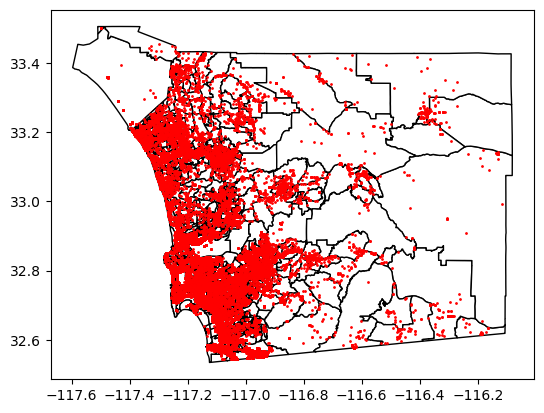

In [4]:
base = blocks.plot(color='white', edgecolor='black')

df.plot(ax=base, marker='o', color='red', markersize=1)

In [5]:
# Join the nearest blocks to each business
joined_blocks = df.sjoin_nearest(blocks)
joined_blocks

/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

#### Creating New Shapes from K-Means clustering

In [6]:
# Cluster points together initially to get an idea of clusters, then use those clusters to create new shapes?

# kmeans using x, y values of businesses -> getting cluster labels -> finding nearest ctblock for those new labels, then dissolve

# Might just be better to use their k-means ++ rather than finding where things are based on the shape

from sklearn.cluster import KMeans

new_centers = blocks.loc[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts()
                                                                    .iloc[:70].index)].geometry.centroid

points = pd.DataFrame([joined_blocks['geometry'].x, joined_blocks['geometry'].y]).T.rename(columns={0: 'point_x', 1: 'point_y'})

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks
# Get centers from clusters and use them as the centers to generate cluser

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3991396906.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .iloc[:70].index)].geometry.centroid
/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

<Axes: >

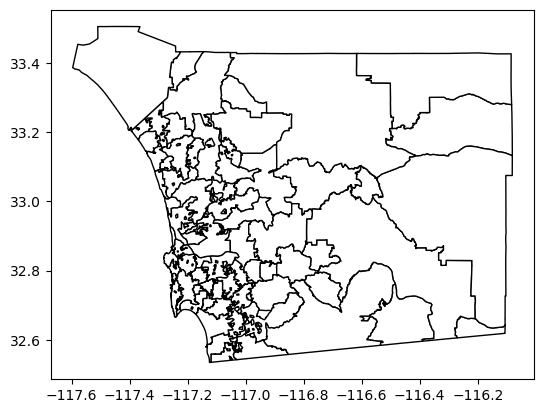

In [7]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

blocks['test'] = blocks['CTBLOCKGROUP'].map(new_dict)

new_blocks = blocks.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

<Axes: >

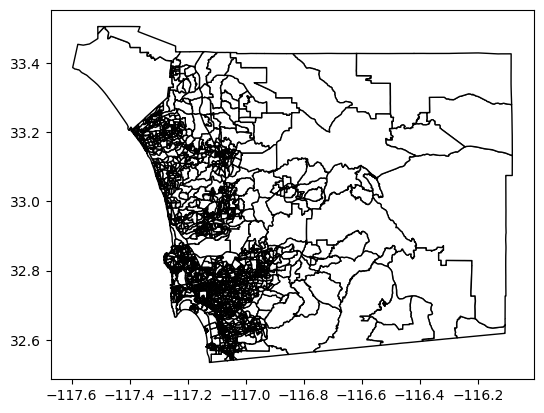

In [8]:
blocks.plot(color='white', edgecolor='black')

In [9]:
### Trying with k-means, centers outward

df['APN']

0        1.010101e+09
1        1.010101e+09
2        1.010101e+09
3        1.010101e+09
4        1.010101e+09
             ...     
98158    0.000000e+00
98159    0.000000e+00
98160    0.000000e+00
98161    0.000000e+00
98162    0.000000e+00
Name: APN, Length: 98162, dtype: float64

In [10]:
from sklearn.cluster import KMeans

centroids = blocks[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.cluster_centers_ = list(zip(centroids.x, centroids.y))
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks


/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/613337971.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = blocks[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

<Axes: >

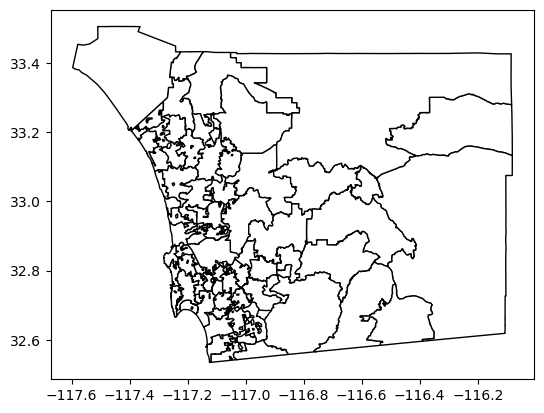

In [11]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

blocks['test'] = blocks['CTBLOCKGROUP'].map(new_dict)

new_blocks = blocks.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

### Merging with Census Tract

In [12]:
## Try out Census Tract

tracts = pd.read_csv("../data/Census_Tracts_2020_20240226.csv")
tracts['geometry'] = tracts['the_geom'].apply(wkt.loads)
tracts.drop(columns=['the_geom'], inplace=True)
tracts = gpd.GeoDataFrame(tracts, crs='EPSG:4326')
tracts

OBJECTID       GEOID     CT  Shape_Length    Shape_Area  \
0         343  6073013315  13315  14731.300118  1.361873e+07   
1         116  6073005500   5500   9038.712264  4.740261e+06   
2         568  6073018517  18517  19968.703453  2.089468e+07   
3         710  6073020813  20813  54680.988261  1.417909e+08   
4         176  6073008339   8339  69458.557531  1.276369e+08   
..        ...         ...    ...           ...           ...   
731       615  6073019303  19303  52571.063397  9.102588e+07   
732       563  6073018510  18510  28092.429217  2.149973e+07   
733       316  6073012302  12302   9265.775478  4.386708e+06   
734       248  6073009308   9308  17602.726290  9.999563e+06   
735       653  6073020033  20033  19741.659768  1.771129e+07   

                                              geometry  
0    MULTIPOLYGON (((-116.95513 32.64096, -116.9551...  
1    MULTIPOLYGON (((-117.14639 32.72793, -117.1460...  
2    MULTIPOLYGON (((-117.29359 33.19467, -117.2936...  
3    MULTIPOLYGON (((-116.85075 33.05116, -116.8500...  
4    MULTIPOLYGON (((-117.24555 32.93049, -117.2453...  
..                                                 ...  
731  MULTIPOLYGON (((-117.23317 33.25363, -117.2329...  
732  MULTIPOLYGON (((-117.33332 33.21199, -117.3333...  
733  MULTIPOLYGON (((-117.08225 32.63681, -117.0826...  
734  MULTIPOLYGON (((-117.14104 32.77529, -117.1406...  
735  MULTIPOLYGON (((-117.24117 33.10212, -117.2426...  

[736 rows x 6 columns]

In [13]:
joined_tracts = df.sjoin_nearest(tracts)
joined_tracts

/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
94923  6.786702e+09     93.0              TBRB HOLDINGS INC   
94924  6.786702e+09    131.0           MYPOINT CREDIT UNION   
94925  6.786702e+09    325.0           C&J KIDS CORPORATION   
94926  6.786710e+09    261.0            4S RANCH HOLDCO LLC   
97866  7.602442e+09     44.0    BOYS&GIRLS CLUBS OF GREATER   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
94923      DBA MASSAGE HEIGHTS                            None   
94924                     None                            None   
94925       DBA KIDS CARE CLUB                            None   
94926                     None                            None   
97866                SAN DIEGO                            None   

                           CAREOF   STRNUM STRFRA STRDIR         STRNAM  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None    ROCKY POINT   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None      H&R BLOCK   
2                            None      0.0   None   None    PO BOX 4489   
3            DBA MCDONALDS #34729  23113.0   None   None   PLAZA POINTE   
4                   ATTN TAX DEPT    200.0   None      S            4TH   
...                           ...      ...    ...    ...            ...   
94923                        None  10413.0   None   None      CRAFTSMAN   
94924          C/O TAX DEPARTMENT   9420.0   None   None        FARNHAM   
94925                        None  10414.0   None   None      CRAFTSMAN   
94926                        None   3501.0   None   None       JAMBOREE   
97866                        None      0.0   None   None  PO BOX 178569   

      STRTYP STRSRM           CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD  \
0         DR   None      OCEANSIDE    CA   None  92056.0     0.0   None   
1        WAY   None    KANSAS CITY    MO   None  64105.0     0.0   None   
2       None   None      OCEANSIDE    CA   None  92052.0     0.0   None   
3         DR   #100   LAGUNA HILLS    CA   None  92653.0     0.0   None   
4        AVE   #100      NASHVILLE    TN   None  37201.0     0.0   None   
...      ...    ...            ...   ...    ...      ...     ...    ...   
94923    WAY   #100      SAN DIEGO    CA   None  92127.0     0.0   None   
94924     ST   None      SAN DIEGO    CA   None  92123.0     0.0   None   
94925    WAY   None      SAN DIEGO    CA   None  92127.0     0.0   None   
94926     RD  #3000  NEWPORT BEACH    CA   None  92660.0     0.0   None   
97866   None   None      SAN DIEGO    CA   None  92177.0     0.0   None   

         LOCNUM LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0      525111.0   None   None        BASILONE     RD  000501  CAMP PENDLETON   
1           0.0   None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2      520407.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
3      430314.0   None   None           BROWN     ST    None  CAMP PENDLETON   
4       51091.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
...         ...    ...    ...             ...    ...     ...             ...   
94923   10413.0   None   None       CRAFTSMAN    WAY  000100       SAN DIEGO   
94924   10413.0   None  

In [14]:
centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans_tracts = KMeans(n_clusters=70)
kmeans_tracts.cluster_centers_ = list(zip(centroids_tract.x, centroids_tract.y))
joined_tracts['x'] = joined_tracts['geometry'].x
joined_tracts['y'] = joined_tracts['geometry'].y
kmeans_tracts.fit(joined_tracts[['x','y']])

joined_tracts['cluster'] = kmeans_tracts.labels_


/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3231829559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

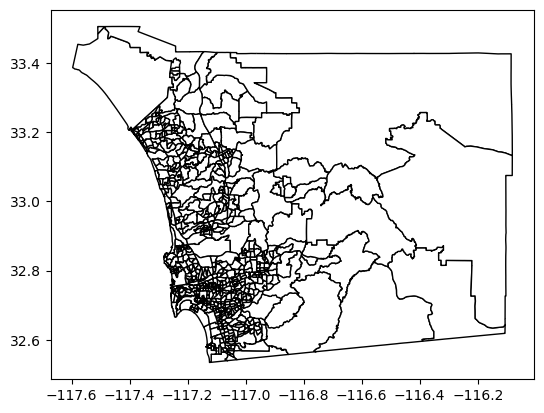

In [15]:
test1 = joined_tracts.groupby(['CT', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CT')['cluster'].to_dict()

tracts['test'] = blocks['CT'].map(new_dict)

new_tracts = tracts.dissolve(by='test').reset_index()
new_tracts.plot(color='white', edgecolor='black')

In [16]:
joined_tracts_new = df.sjoin_nearest(new_tracts)
joined_tracts_new

/Users/michaelsmith/opt/anaconda3/envs/dt_employment_center/lib/python3.12/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
80193  5.386703e+09    518.0                   CHUNG PLAQUE   
96114  7.601049e+09    324.0          VISTA HILL FOUNDATION   
96916  7.602129e+09      2.0              CITY OF SAN DIEGO   
96917  7.602129e+09     44.0       VETERANS MEMORIAL CENTER   
97294  7.602270e+09    382.0                 MILLER CAROL A   

                          OWNNAM2                         OWNNAM3  \
0                            None                            None   
1                 H&R BLOCK #6438                            None   
2         DBA DOMINOS PIZZA #8357                            None   
3                    OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4                  OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                           ...                             ...   
80193                        None                            None   
96114  DBA STEIN EDUCATION CENTER                            None   
96916  BALBOA PARK ADMINISTRATION                            None   
96917      DBA VETERANS MUSEUM AT                      BALBOA THE   
97294      DBA KEN MILLER WELDING                            None   

                           CAREOF   STRNUM STRFRA STRDIR           STRNAM  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None      ROCKY POINT   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None        H&R BLOCK   
2                            None      0.0   None   None      PO BOX 4489   
3            DBA MCDONALDS #34729  23113.0   None   None     PLAZA POINTE   
4                   ATTN TAX DEPT    200.0   None      S              4TH   
...                           ...      ...    ...    ...              ...   
80193                        None     32.0   None   None    NAVAL STATION   
96114                        None   8910.0   None   None  CLAIREMONT MESA   
96916                        None   2125.0   None   None             PARK   
96917                        None   2115.0   None   None             PARK   
97294                        None   4570.0   None   None  ALVARADO CANYON   

      STRTYP STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD  \
0         DR   None     OCEANSIDE    CA   None  92056.0     0.0   None   
1        WAY   None   KANSAS CITY    MO   None  64105.0     0.0   None   
2       None   None     OCEANSIDE    CA   None  92052.0     0.0   None   
3         DR   #100  LAGUNA HILLS    CA   None  92653.0     0.0   None   
4        AVE   #100     NASHVILLE    TN   None  37201.0     0.0   None   
...      ...    ...           ...   ...    ...      ...     ...    ...   
80193     ST   None     SAN DIEGO    CA   None  92102.0     0.0   None   
96114   BLVD   None     SAN DIEGO    CA   None  92123.0     0.0   None   
96916   BLVD   None     SAN DIEGO    CA   None  92104.0     0.0   None   
96917   BLVD   None     SAN DIEGO    CA   None  92101.0     0.0   None   
97294     RD     #G     SAN DIEGO    CA   None  92120.0     0.0   None   

         LOCNUM LOCFRA LOCDIR                LOCNAM LOCTYP  LOCSRM  \
0      525111.0   None   None              BASILONE     RD  000501   
1           0.0   None   None        CAMP PENDLETON   None    None   
2      520407.0   None   None              BASILONE     RD    None   
3      430314.0   None   None                 BROWN     ST    None   
4       51091.0   None   None              BASILONE     RD    None   
...         ...    ...    ...                   ...    ...     ...   
80193       0.0   None   None  NAVSTA NAVY EXCHANGE   None    None   
96114    6145.0   None   None                DECENA     

In [17]:
new_industries = pd.read_csv('../generate_labels.csv')

dict_industries = dict(zip(new_industries.Items, new_industries.Categories))

joined_tracts_new['Industry'] = joined_tracts_new['BUSTYPE'].map(dict_industries)

In [18]:
joined_tracts_new['Industry'].value_counts().index

Index(['Retail and Services', 'Construction and Manufacturing',
       'Professional and Financial', 'Health and Welfare'],
      dtype='object', name='Industry')

<Figure size 1200x600 with 0 Axes>

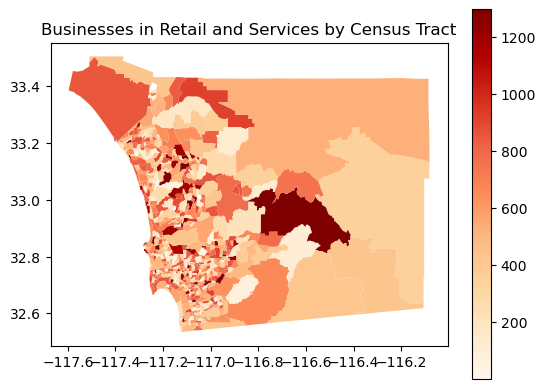

<Figure size 1200x600 with 0 Axes>

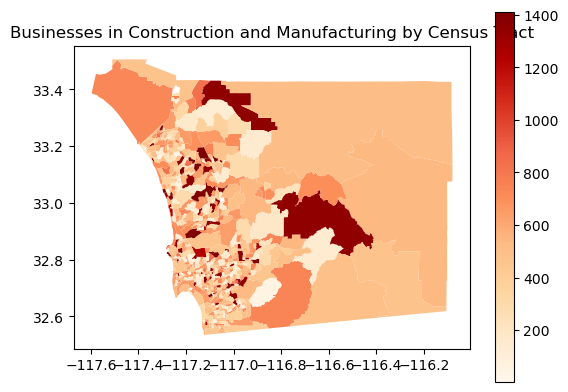

<Figure size 1200x600 with 0 Axes>

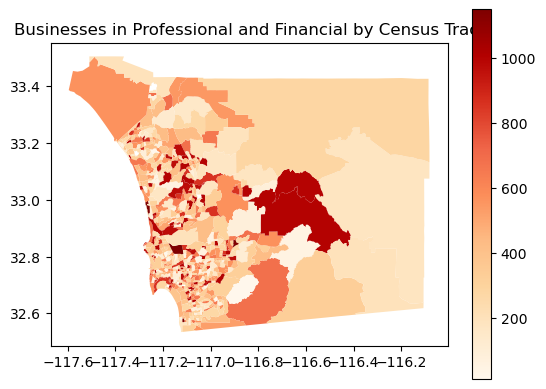

<Figure size 1200x600 with 0 Axes>

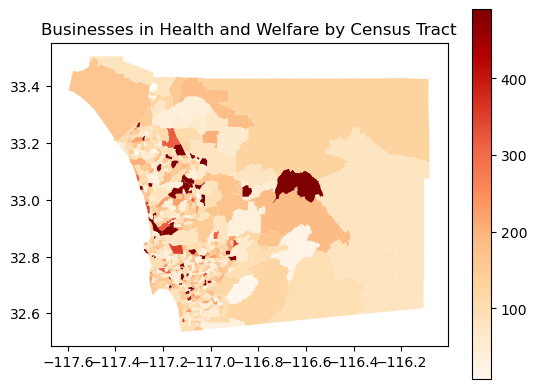

In [19]:
### For each of the 4 types of industries, graph how each looks in each the above graph

def plot_by_industry(census_tracts_data, businesses_data, industry):
    # Merge datasets based on a common key, e.g., 'census_tract_id'
    merged_data = pd.merge(census_tracts_data, businesses_data, how='left', on='CT')

    # Filter data for the specified industry
    industry_data = merged_data[merged_data['Industry'] == industry]

    # Group data by census tract and count the number of businesses
    grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x']).size().reset_index(name='business_count'))
    # display(grouped_data)
    grouped_data.set_geometry("geometry_x", inplace=True)
    grouped_data.to_crs('EPSG:4326', inplace=True)

    # Plot the data
    plt.figure(figsize=(12, 6))
    grouped_data.plot(column='business_count', legend=True,cmap='OrRd')
    # plt.bar(grouped_data['CT'], grouped_data['business_count'])
    # plt.xlabel('Census Tract ID')
    # plt.ylabel('Number of Businesses')
    plt.title(f'Businesses in {industry} by Census Tract')
    plt.show()

    return grouped_data

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)


<Axes: >

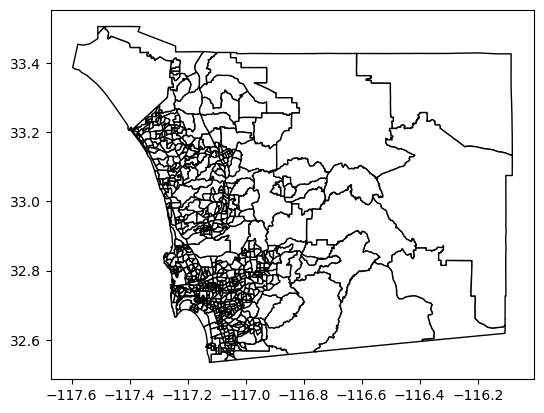

In [20]:
tracts.plot(color='white', edgecolor='black')

<Axes: >

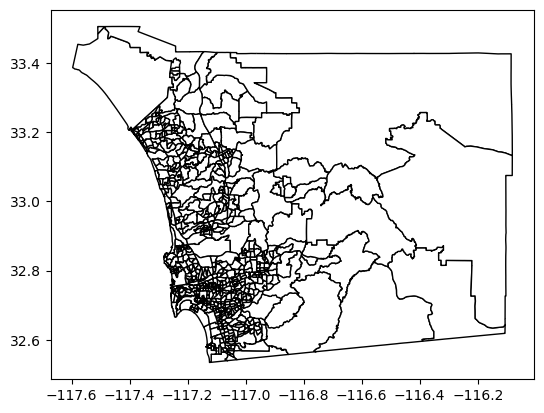

In [21]:
new_tracts.plot(color='white', edgecolor='black')

In [22]:
def plot_by_industry(census_tracts_data, businesses_data, industry):

    return grouped_data
    

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)

NameError: name 'grouped_data' is not defined

In [ ]:
print(i)

Retail and Services


In [24]:
industry = 'Health and Welfare'

In [ ]:
points

point_x    point_y
0     -117.498891  33.501317
1     -117.498891  33.501317
2     -117.498891  33.501317
3     -117.498891  33.501317
4     -117.498891  33.501317
...           ...        ...
95648 -117.132925  32.631843
95649 -117.132925  32.631843
95650 -117.130477  32.627290
95659 -117.167646  32.684790
97842 -117.111539  32.821967

[98162 rows x 2 columns]

In [23]:
merged_data = pd.merge(new_tracts, joined_tracts_new, how='left', on='CT')

merged_data

test_x                                         geometry_x  OBJECTID_x  \
0         1.0  MULTIPOLYGON (((-116.98352 32.64181, -116.9836...         723   
1         1.0  MULTIPOLYGON (((-116.98352 32.64181, -116.9836...         723   
2         1.0  MULTIPOLYGON (((-116.98352 32.64181, -116.9836...         723   
3         1.0  MULTIPOLYGON (((-116.98352 32.64181, -116.9836...         723   
4         1.0  MULTIPOLYGON (((-116.98352 32.64181, -116.9836...         723   
...       ...                                                ...         ...   
98157    69.0  MULTIPOLYGON (((-117.12223 32.74810, -117.1221...         603   
98158    69.0  MULTIPOLYGON (((-117.12223 32.74810, -117.1221...         603   
98159    69.0  MULTIPOLYGON (((-117.12223 32.74810, -117.1221...         603   
98160    69.0  MULTIPOLYGON (((-117.12223 32.74810, -117.1221...         603   
98161    69.0  MULTIPOLYGON (((-117.12223 32.74810, -117.1221...         603   

          GEOID_x     CT  Shape_Length_x  Shape_Area_x           APN  BCCCODE  \
0      6073021304  21304   145819.897438  8.662167e+08  4.193311e+09     92.0   
1      6073021304  21304   145819.897438  8.662167e+08  4.193311e+09    313.0   
2      6073021304  21304   145819.897438  8.662167e+08  4.193311e+09    313.0   
3      6073021304  21304   145819.897438  8.662167e+08  4.193311e+09    314.0   
4      6073021304  21304   145819.897438  8.662167e+08  4.193311e+09    322.0   
...           ...    ...             ...           ...           ...      ...   
98157  6073019107  19107   153642.027068  1.098253e+09  7.601700e+09    295.0   
98158  6073019107  19107   153642.027068  1.098253e+09  7.601700e+09    295.0   
98159  6073019107  19107   153642.027068  1.098253e+09  7.601700e+09    298.0   
98160  6073019107  19107   153642.027068  1.098253e+09  7.602412e+09     44.0   
98161  6073019107  19107   153642.027068  1.098253e+09  7.602441e+09    295.0   

                            OWNNAM1                       OWNNAM2 OWNNAM3  \
0                       LUCERO JOSE      DBA ULTRACUT HAIRSTYLING    None   
1                    RAMIREZ CARMEN     DBA MARITZAS MEXICAN FOOD    None   
2                KARIJANIAN MICHAEL      DBA SWEET&SAVORY GOURMET    None   
3                  LOMELIN MICHELLE  DBA SWEET PETITE CONFECTIONS    None   
4              PREMIER DANCE STUDIO                          None    None   
...                             ...                           ...     ...   
98157   SAN DIEGO DIGESTIVE DISEASE               CONSULTANTS INC    None   
98158       TERESE DUAREWICZ MD INC                          None    None   
98159     LABORATORY CORPORATION OF                       AMERICA    None   
98160  CENTER FOR INJURY PREVENTION             AKA RACELEGAL.COM    None   
98161      ARCH HEALTH PARTNERS INC                          None    None   

                         CAREOF   STRNUM STRFRA STRDIR         STRNAM STRTYP  \
0                          None   3564.0   None   None      MT ACADIA   BLVD   
1                          None   3582.0   None   None      MT ACADIA   BLVD   
2                          None   3574.0   None   None      MT ACADIA   BLVD   
3                          None   3582.0   None   None      MT ACADIA   BLVD   
4                          None   3582.0   None   None      MT ACADIA   BLVD   
...                         ...      ...    ...    ...            ...    ...   
98157                      None   8008.0   None   None          FROST     ST   
98158                      None  15611.0   None   None       POMERADO     RD   
98159  ATTN PROPERTY ACCOUNTING      0.0   None   None    PO BOX 2230   None   
98160                      None      0.0   None   None  PO BOX 600943   None   
98161      ATTN ACCOUNTING DEPT  15611.0   None   None       POMERADO     RD   

      STRSRM        CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD   LOCNUM LOCFRA  \
0       None   SAN DIEGO    CA   None  92111.0     0.0   None   3564.0   None   
1         #D   SAN DIEGO 

In [24]:
# Filter data for the specified industry
industry_data = merged_data[merged_data['Industry'] == industry]
industry_data
gpd.GeoDataFrame(industry_data.groupby('geometry_x').count().reset_index()[['geometry_x','CT']]).set_geometry('geometry_x').explore()

NameError: name 'industry' is not defined

In [25]:

# Group data by census tract and count the number of businesses
grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x', 'Shape_Area_x']).size().reset_index(name='business_count'))
grouped_data['business_density'] = grouped_data['business_count'] / grouped_data['Shape_Area_x']
grouped_data.set_geometry("geometry_x", inplace=True)
grouped_data.to_crs('EPSG:4326', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
grouped_data.plot(column='business_density', legend=True,cmap='OrRd')
# plt.bar(grouped_data['CT'], grouped_data['business_count'])
# plt.xlabel('Census Tract ID')
# plt.ylabel('Number of Businesses')
plt.title(f'Businesses in {industry} by Census Tract')
plt.show()

NameError: name 'industry_data' is not defined

In [26]:
df['x'] = df['geometry'].x
df['y'] = df['geometry'].y

In [27]:
other_points = df[['x', 'y']].values
k = 70
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(other_points)
df['cluster'] = kmeans.labels_

In [28]:

labels = pd.read_csv('../generate_labels.csv')

In [ ]:
thing

cluster_left   CT  \
geometry_y                                                             
MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62   62   
POLYGON ((-117.16406 32.72342, -117.16411 32.7...           170  170   
MULTIPOLYGON (((-117.22047 32.72323, -117.2223...           183  183   
POLYGON ((-117.15568 32.68760, -117.15515 32.6...            30   30   
POLYGON ((-117.08997 32.65561, -117.08994 32.6...           139  139   
...                                                         ...  ...   
POLYGON ((-116.31816 32.85851, -116.32223 32.8...             6    6   
POLYGON ((-116.81334 32.85603, -116.81301 32.8...             3    3   
POLYGON ((-116.68758 32.84176, -116.68432 32.8...            22   22   
POLYGON ((-116.73722 32.79375, -116.73695 32.7...             3    3   
POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1    1   

                                                   index_right  Categories  \
geometry_y                                                                   
MULTIPOLYGON (((-117.24133 32.72938, -117.2412...           62          62   
POLYGON ((-117.16406 32.72342, -117.16411 32.7...          170         170   
MULTIPOLYGON (((-117.22047 32.72323, -117.2223...          183         183   
POLYGON ((-117.15568 32.68760, -117.15515 32.6...           30          30   
POLYGON ((-117.08997 32.65561, -117.08994 32.6...          139         139   
...                                                        ...         ...   
POLYGON ((-116.31816 32.85851, -116.32223 32.8...            6           6   
POLYGON ((-116.81334 32.85603, -116.81301 32.8...            3           3   
POLYGON ((-116.68758 32.84176, -116.68432 32.8...           22          22   
POLYGON ((-116.73722 32.79375, -116.73695 32.7...            3           3   
POLYGON ((-116.54254 32.81872, -116.54219 32.8...            1           1   

                                                   cluster_right  
geometry_y                                                        
MULTIPOLYGON (((-117.24133 32.72938, -117.2412...             62  
POLYGON ((-117.16406 32.72342, -117.16411 32.7...            170  
MULTIPOLYGON (((-117.22047 32.72323, -117.2223...            183  
POLYGON ((-117.15568 32.68760, -117.15515 32.6...             30  
POLYGON ((-117.08997 32.65561, -117.08994 32.6...            139  
...                                                          ...  
POLYGON ((-116.31816 32.85851, -116.32223 32.8...              6  
POLYGON ((-116.81334 32.85603, -116.81301 32.8...              3  
POLYGON ((-116.68758 32.84176, -116.68432 32.8...             22  
POLYGON ((-116.73722 32.79375, -116.73695 32.7...              3  
POLYGON ((-116.54254 32.81872, -116.54219 32.8...              1  

[65 rows x 5 columns]

In [102]:
wac = pd.read_csv('../data/ca_wac_S000_JT00_2021.csv.gz', compression='gzip', dtype={'w_geocode': str})
blocks = pd.read_csv("../data/Census_Blocks_20231127.csv", dtype={'GEOID20': str})
blocks

merged_blocks = gpd.GeoDataFrame(blocks.merge(sd_wac, left_on="GEOID20", right_on="w_geocode"))


merged_blocks['geometry'] = merged_blocks['the_geom'].apply(wkt.loads)
merged_blocks.drop(columns=['the_geom'], inplace=True)
merged_blocks=merged_blocks.set_crs(crs='EPSG:4326')
merged_blocks = gpd.GeoDataFrame(merged_blocks, crs='EPSG:4326')
merged_blocks['centroid'] = merged_blocks['geometry'].centroid
merged_blocks=merged_blocks[['centroid','C000','CA01','CA02','CA03','CE01','CE02','CE03']]
merged_blocks = merged_blocks.rename(columns={'C000':'Total # of Jobs','CA01':'Jobs for workers aged <=29','CA02':'Jobs for workers aged 30-54','CA03':'Jobs for workers aged 55+','CE01':'Jobs with earnings >=$1250/month','CE02':'Jobs with earnings $1251-$3333/month','CE03':'Jobs with earnings $1333+/month'})

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/1952082785.py:8: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  merged_blocks['geometry'] = merged_blocks['the_geom'].apply(wkt.loads)
/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/1952082785.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_blocks['centroid'] = merged_blocks['geometry'].centroid


In [103]:
merged_blocks

centroid  Total # of Jobs  \
0      POINT (-117.23735 32.79799)               22   
1      POINT (-117.26255 32.81642)                9   
2      POINT (-117.08669 32.73210)                6   
3      POINT (-117.28444 33.02667)                6   
4      POINT (-116.81057 32.83664)                4   
...                            ...              ...   
15971  POINT (-117.16988 32.69507)                1   
15972  POINT (-117.01925 32.58333)                1   
15973  POINT (-117.08255 32.74044)               10   
15974  POINT (-117.08941 32.78495)              402   
15975  POINT (-116.84419 32.78549)               12   

       Jobs for workers aged <=29  Jobs for workers aged 30-54  \
0                               3                           16   
1                               3                            4   
2                               3                            3   
3                               2                            2   
4                               0                            4   
...                           ...                          ...   
15971                           0                            0   
15972                           0                            1   
15973                           2                            3   
15974                          66                          185   
15975                           5                            5   

       Jobs for workers aged 55+  Jobs with earnings >=$1250/month  \
0                              3                                 0   
1                              2                                 1   
2                              0                                 3   
3                              2                                 0   
4                              0                                 1   
...                          ...                               ...   
15971                          1                                 0   
15972                          0                                 0   
15973                          5                                 6   
15974                        151                                80   
15975                          2                                10   

       Jobs with earnings $1251-$3333/month  Jobs with earnings $1333+/month  
0                                         5                               17  
1                                         4                                4  
2                                         3                                0  
3                                         3                                3  
4                                         3                                0  
...                                     ...                              ...  
15971                                     0                                1  
15972                                     0                                1  
15973                                     4                                0  
15974                                   146                              176  
15975                                     2                                0  

[15976 rows x 8 columns]

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3640976089.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


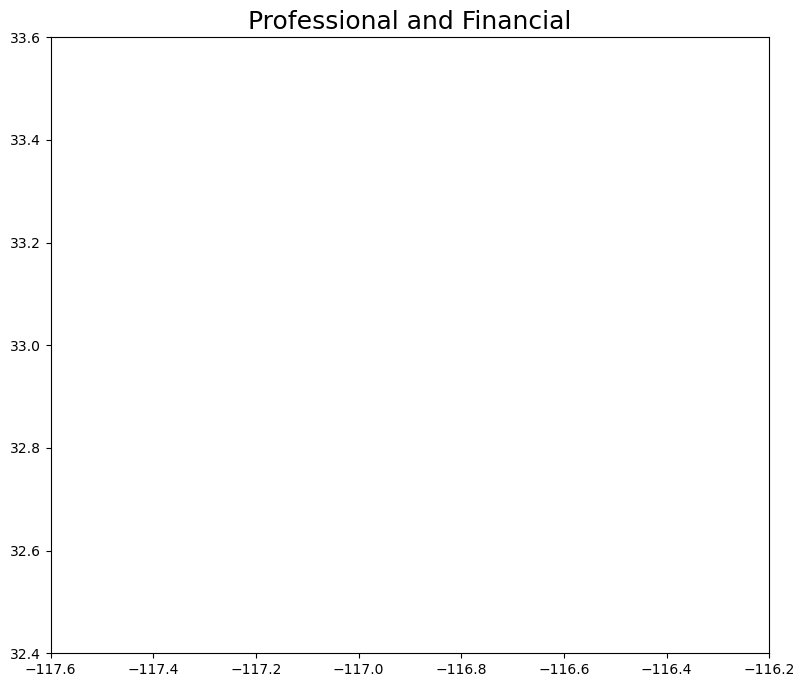

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3640976089.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


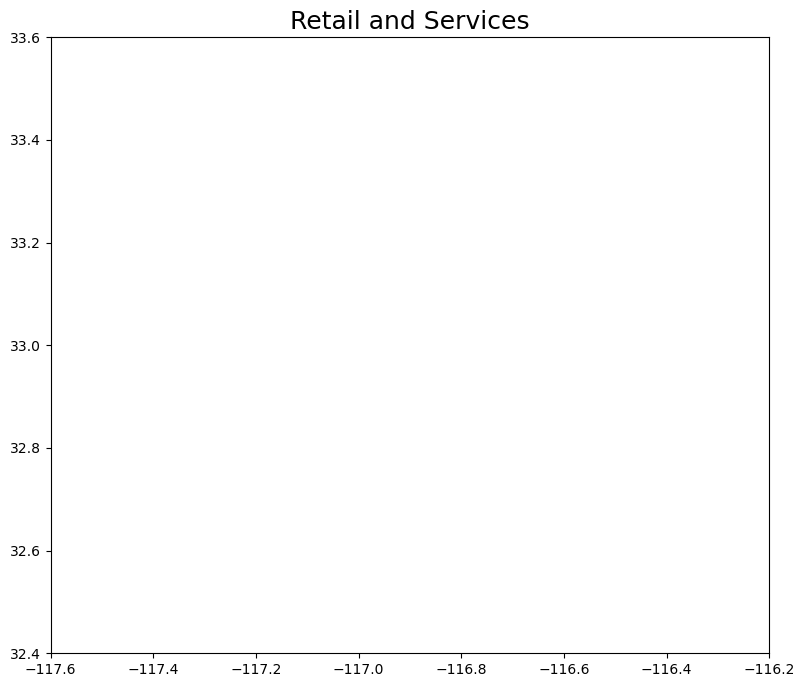

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3640976089.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


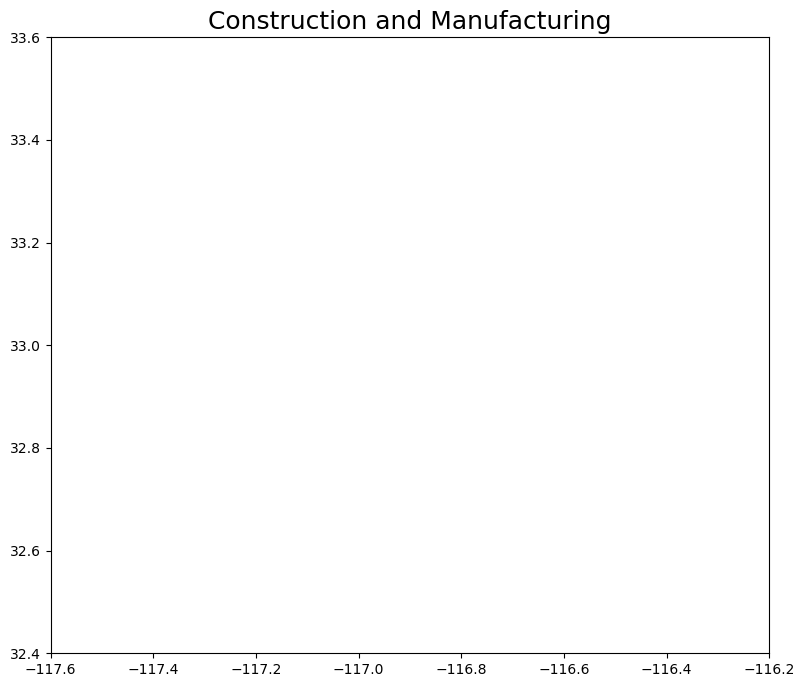

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3640976089.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


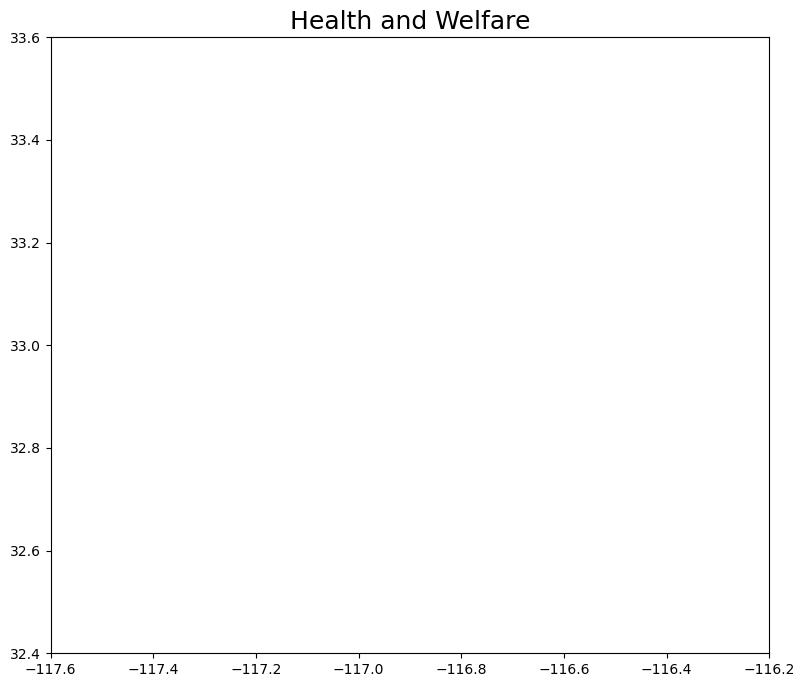

In [119]:

for i in labels['Categories'].unique():
    df = df.set_geometry('geometry')
    df2 = df.merge(labels, how='left', left_on='BUSTYPE',right_on='Items')[['geometry','Categories','cluster']]
    df2 = df2[df2['Categories']==i]
    tracts = tracts.set_geometry('geometry')
    pre_groupby = tracts.sjoin(df2, how='right', predicate='contains')
    geo = gpd.GeoDataFrame(pre_groupby.merge(tracts, on='CT').set_geometry('geometry_y').groupby(['CT','geometry_y'])['cluster'].agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>0 else -1).to_frame().reset_index()).set_geometry('geometry_y')
    shapes = geo.dissolve(by='cluster',aggfunc='sum').reset_index()
    thing = shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').count()
    geothing = gpd.GeoDataFrame(thing.reset_index()).set_geometry('geometry_y')
    fig, ax = plt.subplots(figsize=(10, 8))
    geothing['area'] = geothing['geometry_y'].area
    geothing['business_density'] = geothing['CT']/geothing['area']
    final_merge = geothing.drop(columns=['index_right']).sjoin(merged_blocks, predicate='contains')
    final_merge = gpd.GeoDataFrame(final_merge.groupby(['geometry_y','business_density']).sum().reset_index()).set_geometry('geometry_y')
    final_merge['geometry_y']=final_merge['geometry_y'].to_crs('EPSG:3857')

    final_merge.plot(ax=ax, column='business_density', legend=False,cmap='OrRd').set_title(i)
    final_merge.to_file('../output/tract/crs/'+i+'.json',driver="GeoJSON")
    
    ax.set_title(i, fontsize=18)
    ax.set_xlim([-117.6, -116.2])
    ax.set_ylim([32.4, 33.6])
    plt.show()

In [112]:
final_merge

geometry_y  business_density  \
0   MULTIPOLYGON (((-117.23703 32.70798, -117.2370...      98231.632379   
1   POLYGON ((-117.15944 32.74069, -117.15943 32.7...     478583.119700   
2   MULTIPOLYGON (((-117.17805 32.72738, -117.1775...     112771.650358   
3   POLYGON ((-117.17728 32.67777, -117.17741 32.6...     359503.768455   
4   POLYGON ((-117.06840 32.56215, -117.06796 32.5...      18433.863853   
..                                                ...               ...   
61  POLYGON ((-116.68758 32.84176, -116.68432 32.8...       3851.710684   
62  POLYGON ((-116.56010 32.82325, -116.56011 32.8...        135.886575   
63  POLYGON ((-116.85780 32.55703, -116.85941 32.5...      12338.594921   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...        205.318848   
65  POLYGON ((-116.31817 32.87196, -116.31816 32.8...         55.294710   

    cluster_left      CT  Categories  cluster_right      area  index_right  \
0          67704   67704       67704          67704  0.689228      2875861   
1         309960  309960      309960         309960  0.647662      2886942   
2         118627  118627      118627         118627  1.051922      2638377   
3         858894  858894      858894         858894  2.389110      4393765   
4          17316   17316       17316          17316  0.939358      1899433   
..           ...     ...         ...            ...       ...          ...   
61          1961    1961        1961           1961  0.509124       402527   
62           320     320         320            320  2.354905       297395   
63         56592   56592       56592          56592  4.586584       867337   
64           516     516         516            516  2.513164       385946   
65            78      78          78             78  1.410623       218892   

    Total # of Jobs  Jobs for workers aged <=29  Jobs for workers aged 30-54  \
0              9209                        2380                         4791   
1             43850                       10592                        24437   
2             39658                        8567                        21512   
3             78970                       15348                        46385   
4              5136                        1214                         2623   
..              ...                         ...                          ...   
61             3187                         691                         1721   
62             2422                         493                         1267   
63            16205                        2987                         9309   
64              686                         116                          381   
65              328                          91                          172   

    Jobs for workers aged 55+  Jobs with earnings >=$1250/month  \
0                        2038                              2006   
1                        8821                              7420   
2                        9579                              6501   
3                       17237                              8686   
4                        1299                              1202   
..                        ...                               ...   
61                        775                               578   
62                        662                               259   
63                       3909                              1480   
64                        189                               101   
65                         65                                54   

    Jobs with earnings $1251-$3333/month  Jobs with earnings $1333+/month  
0                                   2888                             4315  
1                                  12376                            24054  
2                                  13092                            20065  
3                                  17046                            53238  
4                                   2289                   

In [99]:
final_merge[['geometry_y','business_density','Jobs for workers aged <=29','Jobs for workers aged 30-54',]]

geometry_y  cluster_left  CT  \
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62  62   
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62  62   
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62  62   
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62  62   
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...            62  62   
..                                                ...           ...  ..   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1   1   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1   1   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1   1   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1   1   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...             1   1   

    Categories  cluster_right      area  business_density  index_right  \
0           62             62  0.001157      53580.882305        12417   
0           62             62  0.001157      53580.882305         4126   
0           62             62  0.001157      53580.882305         5294   
0           62             62  0.001157      53580.882305        15434   
0           62             62  0.001157      53580.882305         5713   
..         ...            ...       ...               ...          ...   
64           1              1  0.058446         17.109904        12286   
64           1              1  0.058446         17.109904         9115   
64           1              1  0.058446         17.109904         5900   
64           1              1  0.058446         17.109904        15391   
64           1              1  0.058446         17.109904         6593   

    Total # of Jobs  Jobs for workers aged <=29  Jobs for workers aged 30-54  \
0                88                          38                           44   
0                 3                           0                            2   
0                 1                           0                            0   
0                 5                           1                            2   
0                 4                           1                            1   
..              ...                         ...                          ...   
64                2                           0                            2   
64                4                           2                            0   
64              160                          20                           99   
64               15                           2                           10   
64                1                           0                            1   

    Jobs for workers aged 30-54  Jobs with earnings >=$1250/month  \
0                             6                                 1   
0                             1                                 0   
0                             1                                 0   
0                             2                                 1   
0                             2                                 0   
..                          ...                               ...   
64                            0                                 1   
64                            2                                 0   
64                           41                                20   
64                            3                                 1   
64                            0                                 0   

    Jobs with earnings $1251-$3333/month  Jobs with earnings $1333+/month  
0                                      4                               83  
0                                      1                                2  
0                                      1                                0  
0                                      0                                4  
0                                      1                                3  
..     

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/3536725008.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


geometry_y  cluster_left    CT  \
0   MULTIPOLYGON (((-117.23703 32.70798, -117.2370...           186   186   
1   POLYGON ((-117.15944 32.74069, -117.15943 32.7...           861   861   
2   MULTIPOLYGON (((-117.17805 32.72738, -117.1775...           379   379   
3   POLYGON ((-117.17728 32.67777, -117.17741 32.6...          1542  1542   
4   POLYGON ((-117.06840 32.56215, -117.06796 32.5...            74    74   
..                                                ...           ...   ...   
61  POLYGON ((-116.68758 32.84176, -116.68432 32.8...            37    37   
62  POLYGON ((-116.56010 32.82325, -116.56011 32.8...             8     8   
63  POLYGON ((-116.85780 32.55703, -116.85941 32.5...           524   524   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...            12    12   
65  POLYGON ((-116.31817 32.87196, -116.31816 32.8...             3     3   

    index_right  Categories  cluster_right      area  business_density  
0           186         186            186  0.001893      98231.632379  
1           861         861            861  0.001799     478583.119700  
2           379         379            379  0.003361     112771.650358  
3          1542        1542           1542  0.004289     359503.768455  
4            74          74             74  0.004014      18433.863853  
..          ...         ...            ...       ...               ...  
61           37          37             37  0.009606       3851.710684  
62            8           8              8  0.058873        135.886575  
63          524         524            524  0.042468      12338.594921  
64           12          12             12  0.058446        205.318848  
65            3           3              3  0.054255         55.294710  

[66 rows x 8 columns]

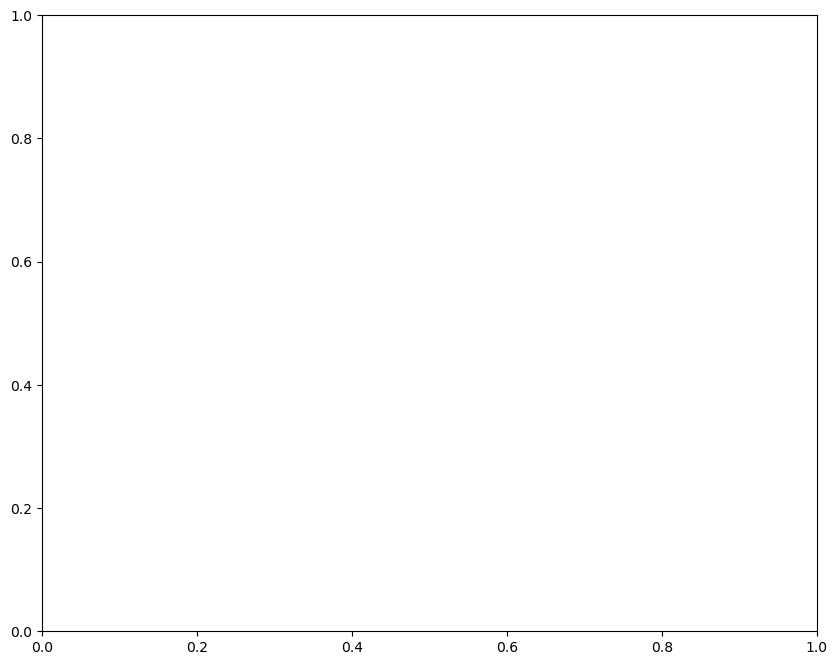

In [104]:
df = df.set_geometry('geometry')
df2 = df.merge(labels, how='left', left_on='BUSTYPE',right_on='Items')[['geometry','Categories','cluster']]
df2 = df2[df2['Categories']==i]
tracts = tracts.set_geometry('geometry')
pre_groupby = tracts.sjoin(df2, how='right', predicate='contains')
geo = gpd.GeoDataFrame(pre_groupby.merge(tracts, on='CT').set_geometry('geometry_y').groupby(['CT','geometry_y'])['cluster'].agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>0 else -1).to_frame().reset_index()).set_geometry('geometry_y')
shapes = geo.dissolve(by='cluster',aggfunc='sum').reset_index()
thing = shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').count()
geothing = gpd.GeoDataFrame(thing.reset_index()).set_geometry('geometry_y')
fig, ax = plt.subplots(figsize=(10, 8))
geothing['area'] = geothing['geometry_y'].area
geothing['business_density'] = geothing['CT']/geothing['area']
geothing
# geothing.plot(ax=ax, column='business_density', legend=False,cmap='OrRd').set_title(i)
# geothing.to_file('../output/tract/'+i+'.json',driver="GeoJSON")
# ax.set_title(i, fontsize=18)
# ax.set_xlim([-117.6, -116.2])
# ax.set_ylim([32.4, 33.6])
# plt.show()

In [105]:
geothing
merged_blocks=merged_blocks.set_geometry('centroid')
merged_blocks

centroid  Total # of Jobs  \
0      POINT (-117.23735 32.79799)               22   
1      POINT (-117.26255 32.81642)                9   
2      POINT (-117.08669 32.73210)                6   
3      POINT (-117.28444 33.02667)                6   
4      POINT (-116.81057 32.83664)                4   
...                            ...              ...   
15971  POINT (-117.16988 32.69507)                1   
15972  POINT (-117.01925 32.58333)                1   
15973  POINT (-117.08255 32.74044)               10   
15974  POINT (-117.08941 32.78495)              402   
15975  POINT (-116.84419 32.78549)               12   

       Jobs for workers aged <=29  Jobs for workers aged 30-54  \
0                               3                           16   
1                               3                            4   
2                               3                            3   
3                               2                            2   
4                               0                            4   
...                           ...                          ...   
15971                           0                            0   
15972                           0                            1   
15973                           2                            3   
15974                          66                          185   
15975                           5                            5   

       Jobs for workers aged 55+  Jobs with earnings >=$1250/month  \
0                              3                                 0   
1                              2                                 1   
2                              0                                 3   
3                              2                                 0   
4                              0                                 1   
...                          ...                               ...   
15971                          1                                 0   
15972                          0                                 0   
15973                          5                                 6   
15974                        151                                80   
15975                          2                                10   

       Jobs with earnings $1251-$3333/month  Jobs with earnings $1333+/month  
0                                         5                               17  
1                                         4                                4  
2                                         3                                0  
3                                         3                                3  
4                                         3                                0  
...                                     ...                              ...  
15971                                     0                                1  
15972                                     0                                1  
15973                                     4                                0  
15974                                   146                              176  
15975                                     2                                0  

[15976 rows x 8 columns]

In [80]:
geothing=geothing.set_geometry('geometry_y')

In [118]:
final_merge['geometry_y'].to_crs('EPSG:3857')==final_merge['geometry_y']

0     False
1     False
2     False
3     False
4     False
      ...  
60    False
61    False
62    False
63    False
64    False
Name: geometry_y, Length: 65, dtype: bool

In [107]:
final_merge = geothing.drop(columns=['index_right']).sjoin(merged_blocks, predicate='contains')
final_merge.groupby(['geometry_y','business_density']).sum().reset_index()


geometry_y  business_density  \
0   MULTIPOLYGON (((-117.23703 32.70798, -117.2370...      98231.632379   
1   POLYGON ((-117.15944 32.74069, -117.15943 32.7...     478583.119700   
2   MULTIPOLYGON (((-117.17805 32.72738, -117.1775...     112771.650358   
3   POLYGON ((-117.17728 32.67777, -117.17741 32.6...     359503.768455   
4   POLYGON ((-117.06840 32.56215, -117.06796 32.5...      18433.863853   
..                                                ...               ...   
61  POLYGON ((-116.68758 32.84176, -116.68432 32.8...       3851.710684   
62  POLYGON ((-116.56010 32.82325, -116.56011 32.8...        135.886575   
63  POLYGON ((-116.85780 32.55703, -116.85941 32.5...      12338.594921   
64  POLYGON ((-116.54254 32.81872, -116.54219 32.8...        205.318848   
65  POLYGON ((-116.31817 32.87196, -116.31816 32.8...         55.294710   

    cluster_left      CT  Categories  cluster_right      area  index_right  \
0          67704   67704       67704          67704  0.689228      2875861   
1         309960  309960      309960         309960  0.647662      2886942   
2         118627  118627      118627         118627  1.051922      2638377   
3         858894  858894      858894         858894  2.389110      4393765   
4          17316   17316       17316          17316  0.939358      1899433   
..           ...     ...         ...            ...       ...          ...   
61          1961    1961        1961           1961  0.509124       402527   
62           320     320         320            320  2.354905       297395   
63         56592   56592       56592          56592  4.586584       867337   
64           516     516         516            516  2.513164       385946   
65            78      78          78             78  1.410623       218892   

    Total # of Jobs  Jobs for workers aged <=29  Jobs for workers aged 30-54  \
0              9209                        2380                         4791   
1             43850                       10592                        24437   
2             39658                        8567                        21512   
3             78970                       15348                        46385   
4              5136                        1214                         2623   
..              ...                         ...                          ...   
61             3187                         691                         1721   
62             2422                         493                         1267   
63            16205                        2987                         9309   
64              686                         116                          381   
65              328                          91                          172   

    Jobs for workers aged 55+  Jobs with earnings >=$1250/month  \
0                        2038                              2006   
1                        8821                              7420   
2                        9579                              6501   
3                       17237                              8686   
4                        1299                              1202   
..                        ...                               ...   
61                        775                               578   
62                        662                               259   
63                       3909                              1480   
64                        189                               101   
65                         65                                54   

    Jobs with earnings $1251-$3333/month  Jobs with earnings $1333+/month  
0                                   2888                             4315  
1                                  12376                            24054  
2                                  13092                            20065  
3                                  17046                            53238  
4                                   2289                   

In [46]:


sd_wac = wac[wac['w_geocode'].isin(blocks['GEOID20'])]

In [48]:
sd_wac

w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  \
176242  060730001001000    18     9     5     4     0     5    13      0   
176243  060730001001002     5     0     2     3     0     2     3      0   
176244  060730001001003     1     0     0     1     0     0     1      0   
176245  060730001001005     3     0     2     1     0     2     1      0   
176246  060730001001010     6     0     2     4     1     0     5      0   
...                 ...   ...   ...   ...   ...   ...   ...   ...    ...   
192213  060730221024008   312    99   169    44    15    54   243      0   
192214  060730221024009     2     0     2     0     0     0     2      0   
192215  060730221024011   217    66   103    48    55    86    76      0   
192216  060730221024012     3     0     1     2     0     1     2      0   
192217  060730221024013   569   203   266   100    92   193   284      0   

        CNS02  CNS03  CNS04  CNS05  CNS06  CNS07  CNS08  CNS09  CNS10  CNS11  \
176242      0      0      0      0      0      7      0      0      0      3   
176243      0      0      0      0      0      0      0      5      0      0   
176244      0      0      0      0      0      0      0      0      0      0   
176245      0      0      0      0      0      0      0      0      0      0   
176246      0      0      0      0      0      0      0      0      2      0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
192213      0      0     34      0      0    195     68      2      0      0   
192214      0      0      0      0      0      0      0      0      0      0   
192215      0      0      5      0     15     45      0      0      0     74   
192216      0      0      0      3      0      0      0      0      0      0   
192217      0      0     69     13      4      5      0      0      5      8   

        CNS12  CNS13  CNS14  CNS15  CNS16  CNS17  CNS18  CNS19  CNS20  CR01  \
176242      8      0      0      0      0      0      0      0      0    13   
176243      0      0      0      0      0      0      0      0      0     5   
176244      1      0      0      0      0      0      0      0      0     1   
176245      3      0      0      0      0      0      0      0      0     2   
176246      0      0      0      0      0      0      0      4      0     6   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...   ...   
192213      4      0      0      9      0      0      0      0      0   236   
192214      2      0      0      0      0      0      0      0      0     2   
192215      0      0      0      0     76      0      0      2      0   168   
192216      0      0      0      0      0      0      0      0      0     3   
192217    153    298      0      0     10      0      4      0      0   405   

        CR02  CR03  CR04  CR05  CR07  CT01  CT02  CD01  CD02  CD03  CD04  \
176242     1     0     0     0     4    15     3     0     2     3     4   
176243     0     0     0     0     0     5     0     0     0     1     4   
176244     0     0     0     0     0     1     0     0     0     0     1   
176245     1     0     0     0     0     0     3     0     1     1     1   
176246     0     0     0     0     0     3     3     2     1     2     1   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
192213    13     2    44     1    16   225    87    34    37    61    81   
192214     0     0     0     0     0     2     0     0     0     2     0   
192215    12     2    21     1    13   147    70    36    32    46    37   
192216     0     0     0     0     0     3     0     0     1     1     1   
192217    32     5   109     2    16   387   182    52    71   110   133   

        CS01  CS02  CFA01  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  \
176242    14     4      0      0      0      0      0      0      0      0   
176243     2     3      0      0      0      0      0      0      0      0   
176244     1     0      0      0      0     

In [62]:
merged_blocks = gpd.GeoDataFrame(blocks.merge(sd_wac, left_on="GEOID20", right_on="w_geocode"))


merged_blocks['geometry'] = merged_blocks['the_geom'].apply(wkt.loads)
merged_blocks.drop(columns=['the_geom'], inplace=True)
merged_blocks=merged_blocks.set_crs(crs='EPSG:4326')
merged_blocks = gpd.GeoDataFrame(merged_blocks, crs='EPSG:4326')
merged_blocks['centroid'] = merged_blocks['geometry'].centroid
merged_blocks

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/1909352994.py:4: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  merged_blocks['geometry'] = merged_blocks['the_geom'].apply(wkt.loads)
/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_43764/1909352994.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_blocks['centroid'] = merged_blocks['geometry'].centroid


OBJECTID  STATEFP20  COUNTYFP20  TRACTCE20  BLOCKCE20          GEOID20  \
0          3385          6          73       7908       2003  060730079082003   
1          8194          6          73       8311       2005  060730083112005   
2         15128          6          73       2705       2019  060730027052019   
3          1849          6          73      17407       1008  060730174071008   
4          5197          6          73      21204       1002  060730212041002   
...         ...        ...         ...        ...        ...              ...   
15971     11211          6          73      11000       1009  060730110001009   
15972      1386          6          73      10018       3009  060730100183009   
15973      1461          6          73       2705       2004  060730027052004   
15974     24426          6          73       9604       4000  060730096044000   
15975     16688          6          73      15502       1024  060730155021024   

           NAME20 MTFCC20  UR20  UACE20  UATYPE20 FUNCSTAT20  ALAND20  \
0      Block 2003   G5040   NaN     NaN       NaN          S    19974   
1      Block 2005   G5040   NaN     NaN       NaN          S   204185   
2      Block 2019   G5040   NaN     NaN       NaN          S    17813   
3      Block 1008   G5040   NaN     NaN       NaN          S    20819   
4      Block 1002   G5040   NaN     NaN       NaN          S   167487   
...           ...     ...   ...     ...       ...        ...      ...   
15971  Block 1009   G5040   NaN     NaN       NaN          S    10216   
15972  Block 3009   G5040   NaN     NaN       NaN          S     5878   
15973  Block 2004   G5040   NaN     NaN       NaN          S    99829   
15974  Block 4000   G5040   NaN     NaN       NaN          S   402291   
15975  Block 1024   G5040   NaN     NaN       NaN          S    74222   

       AWATER20  INTPTLAT20  INTPTLON20  Shape_Length    Shape_Area  \
0             0   32.797987 -117.237335      0.005802  1.922832e-06   
1             0   32.816414 -117.262535      0.026228  1.966061e-05   
2             0   32.732098 -117.086682      0.006460  1.713593e-06   
3             0   33.026669 -117.284433      0.008763  2.009344e-06   
4             0   32.836633 -116.810554      0.021096  1.613062e-05   
...         ...         ...         ...           ...           ...   
15971         0   32.695064 -117.169869      0.004524  9.824016e-07   
15972         0   32.583322 -117.019234      0.003868  5.645543e-07   
15973         0   32.740438 -117.082541      0.022052  9.604270e-06   
15974         0   32.783499 -117.094434      0.049326  3.872247e-05   
15975         0   32.785666 -116.842631      0.019333  7.144251e-06   

             w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  \
0      060730079082003    22     3    16     3     0     5    17      0   
1      060730083112005     9     3     4     2     1     4     4      0   
2      060730027052019     6     3     3     0     3     3     0      0   
3      060730174071008     6     2     2     2     0     3     3      0   
4      060730212041002     4     0     4     0     1     3     0      0   
...                ...   ...   ...   ...   ...   ...   ...   ...    ...   
15971  060730110001009     1     0     0     1     0     0     1      0   
15972  060730100183009     1     0     1     0     0     0     1      0   
15973  060730027052004    10     2     3     5     6     4     0      0   
15974  060730096044000   402    66   185   151    80   146   176      0   
15975  060730155021024    12     5     5     2    10     2     0      0   

       CNS02  CNS03  CNS04  CNS05  CNS06  CNS07  CNS08  CNS09  CNS10  CNS11  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      5      0      0      0      1      0   
2          0      0      0      0      0      0      0      0      0      3   
3          0      0      0      0      0      0      0      4      0      0   
4       

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_41495/1287582210.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


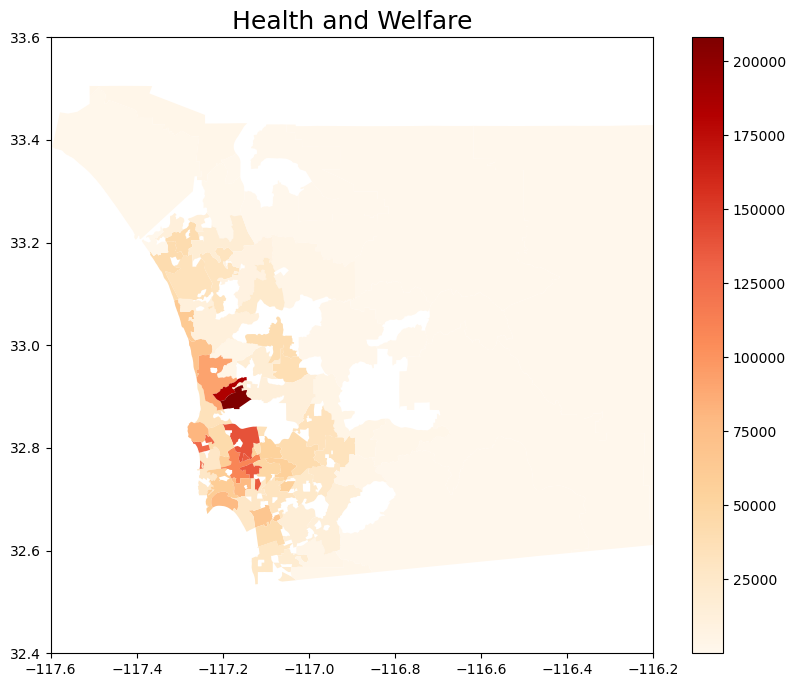

In [40]:

geo_sd.set_geometry('geometry', inplace=True)
info_tracts = {i: [] for i in range(shapes_counts.shape[0])}
info_tracts

geo_sd.sjoin(shapes_counts, predicate='within').groupby('geometry').sum().sort_values(by='C000')

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_41495/3734768521.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geothing['area'] = geothing['geometry_y'].area


In [ ]:
def geometries_to_tracts(groupby_tracts, min_per_tract=10):
    min_per_tract = 10
    clusters_tracts = groupby_tracts.agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>min_per_tract else -1).to_frame()
    clusters_tracts = clusters_tracts[clusters_tracts['cluster']!=-1].reset_index()
    clusters_tracts = clusters_tracts.set_geometry('the_geom')
    clusters_tracts = clusters_tracts.merge(groupby_tracts.count(),on='the_geom', how='left').rename(columns={'cluster_x':'cluster','cluster_y':'count'})

    return  clusters_tracts.dissolve(by='cluster',aggfunc='sum').reset_index()
dissolved = geometries_to_tracts(groupby_tracts)
dissolved.plot(column='count')

NameError: name 'groupby_tracts' is not defined

In [43]:
geothing.explore()